<a href="https://colab.research.google.com/github/thaismenegaldi/web_rag_agent/blob/feat%2Fagent/agent_usage_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧙‍♂️ Ask the Wizarding World - usage example

In [1]:
!git clone https://github.com/thaismenegaldi/web_rag_agent.git

Cloning into 'web_rag_agent'...
remote: Enumerating objects: 288, done.
remote: Counting objects: 100% (288/288), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 288 (delta 166), reused 251 (delta 129), pack-reused 0 (from 0)
Receiving objects: 100% (288/288), 2.99 MiB | 22.52 MiB/s, done.
Resolving deltas: 100% (166/166), done.


In [2]:
import os
from io import BytesIO

from IPython.display import Markdown, display
from PIL import Image

In [3]:
# Change working directory to the project
os.chdir("/content/web_rag_agent")

In [4]:
!pip install -q -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 420.1/420.1 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.3/302.3 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.7/84.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.6/345.6 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/

In [5]:
# Create .env file with APIs credentials
with open('/content/web_rag_agent/.env', 'w') as f:
    f.write("GROQ_API_KEY=<YOUR-CREDENTIAL>\n")
    f.write("SERPAPI_KEY=YOUR-CREDENTIAL\n")

In [6]:
from dotenv import load_dotenv

load_dotenv("/content/web_rag_agent/.env")

True

In [7]:
from retrievers.vector_retriever import VectorRetriever
from agents.agent import RunAgent

In [8]:
# Define paths to config file and source data
config_path = "/content/web_rag_agent/config/config.yml"
path_to_data = "/content/web_rag_agent/data"

In [ ]:
# Initialize the VectorRetriever and load data
vector_retriever = VectorRetriever(
    path_to_data=path_to_data, config_path=config_path
)
retriever = vector_retriever.load_data()

In [10]:
# Initialize the agent with the retriever and config file
agent_graph = RunAgent(
    retriever=retriever,
    config_path=config_path,
)

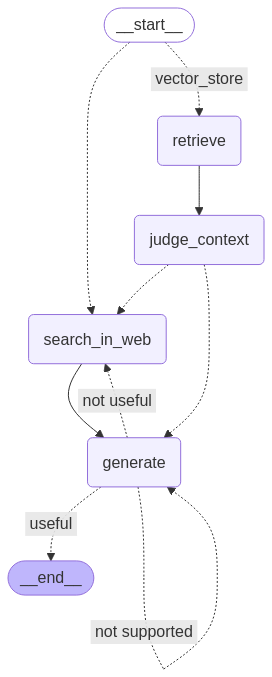

In [11]:
# Display agent diagram
image_bytes = agent_graph.compiled_graph.get_graph(xray=True).draw_mermaid_png()
image = Image.open(BytesIO(image_bytes))
display(image)

In [12]:
# RAG question
question = "Who is Snape?"
agent_output = agent_graph.run_agent(question=question)

print("\n")
display(Markdown(agent_output))


2025-04-08 00:09:22 - INFO - [AGENT STEP] Route user's question

2025-04-08 00:09:22 - INFO - HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"

2025-04-08 00:09:22 - INFO - Route question to rag

2025-04-08 00:09:22 - INFO - [AGENT STEP] Retrieve

2025-04-08 00:09:22 - INFO - Checking documents relevance to the question

2025-04-08 00:09:22 - INFO - HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"

2025-04-08 00:09:22 - INFO - Grade: document relevant!

2025-04-08 00:09:22 - INFO - HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"

2025-04-08 00:09:23 - INFO - Grade: document not relevant!

2025-04-08 00:09:23 - INFO - HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"

2025-04-08 00:09:23 - INFO - Grade: document relevant!

2025-04-08 00:09:23 - INFO - HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"

2025-04-

Snape is a teacher at Hogwarts School of Witchcraft and Wizardry. He teaches Potions and has cold, dark eyes. 


In [13]:
# RAG + web search question
question = "What are the forbidden spells at Hogwarts?"
agent_output = agent_graph.run_agent(question=question)

print("\n")
display(Markdown(agent_output))


2025-04-08 00:09:24 - INFO - [AGENT STEP] Route user's question

2025-04-08 00:09:24 - INFO - HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"

2025-04-08 00:09:24 - INFO - Route question to rag

2025-04-08 00:09:24 - INFO - [AGENT STEP] Retrieve

2025-04-08 00:09:24 - INFO - Checking documents relevance to the question

2025-04-08 00:09:24 - INFO - HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"

2025-04-08 00:09:24 - INFO - Grade: document not relevant!

2025-04-08 00:09:25 - INFO - HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"

2025-04-08 00:09:25 - INFO - Grade: document not relevant!

2025-04-08 00:09:25 - INFO - HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"

2025-04-08 00:09:25 - INFO - Grade: document not relevant!

2025-04-08 00:09:25 - INFO - HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"



According to the Harry Potter Encyclopedia, the forbidden spells at Hogwarts are called the Unforgivable Curses. 

These three Dark spells are illegal and incredibly powerful. They are:

* **The Killing Curse (Avada Kedavra):** This curse instantly kills the victim with no way to block or counter it. 
* **The Imperius Curse:** This curse forces the victim to do the caster's bidding against their will.
* **The Cruciatus Curse:** This curse inflicts excruciating pain on the victim. 





In [14]:
# Web search question
question = "What are the next games of Champions League?"
agent_output = agent_graph.run_agent(question=question)

print("\n")
display(Markdown(agent_output))


2025-04-08 00:09:26 - INFO - [AGENT STEP] Route user's question

2025-04-08 00:09:26 - INFO - HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"

2025-04-08 00:09:26 - INFO - Route question to web search

2025-04-08 00:09:26 - INFO - [AGENT STEP] Web search

2025-04-08 00:09:26 - INFO - HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"

2025-04-08 00:09:27 - INFO - HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"

2025-04-08 00:09:27 - INFO - [AGENT STEP] Generate

2025-04-08 00:09:27 - INFO - Grading generation

2025-04-08 00:09:27 - INFO - Checking generation with user's question

2025-04-08 00:09:27 - INFO - HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"

2025-04-08 00:09:27 - INFO - Decision: generation addresses user's question


The next Champions League games are happening tomorrow:

* **Bayern vs. Inter** at 3:00 PM
* **Arsenal vs. Real Madrid** at 3:00 PM 


Let me know if you'd like to know about any other upcoming matches! 
